In [94]:
from pyod.utils import data
from pyod.models import ocsvm, deep_svdd

from sklearn.metrics import roc_auc_score, balanced_accuracy_score

from matplotlib import pyplot as plt
from matplotlib import cm

from scipy.io import loadmat

import numpy as np

# Exercise 1

In [83]:
# 1.1 

X_train, X_test, y_train, y_test = data.generate_data(n_train=300, n_test=200, n_features=3, contamination=.15)

clf = ocsvm.OCSVM(kernel='linear', contamination=.15)

clf.fit(X_train)

roc = roc_auc_score(y_test, clf.decision_function(X_test))
ba = balanced_accuracy_score(y_test, clf.predict(X_test))

print(f'ROC: {roc:.2f}, BA: {ba:.2f}')

ROC: 0.98, BA: 0.92


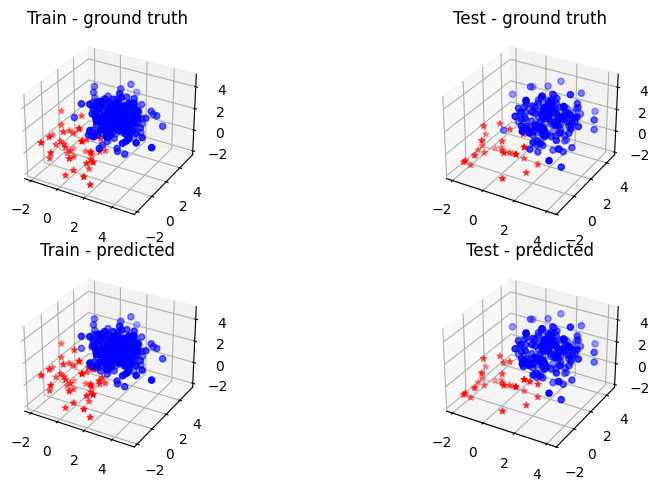

In [84]:
def plot_3d_outliers(X_train, y_train, X_test, y_test, clf):
    fig = plt.figure(figsize=plt.figaspect(0.45))


    ax = fig.add_subplot(221, projection='3d')
    ax.set_title('Train - ground truth')
    
    ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], X_train[y_train==0, 2], c='b', marker='o', label='normal')
    ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], X_train[y_train==1, 2], c='r', marker='*', label='normal')
    
    ax = fig.add_subplot(222, projection='3d')
    ax.set_title('Test - ground truth')
    
    ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], X_test[y_test==0, 2], c='b', marker='o', label='normal')
    ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], X_test[y_test==1, 2], c='r', marker='*', label='normal')
    
    
    ax = fig.add_subplot(223, projection='3d')
    ax.set_title('Train - predicted')
    
    y_hat = clf.predict(X_train)
    
    ax.scatter(X_train[y_hat==0, 0], X_train[y_hat==0, 1], X_train[y_hat==0, 2], c='b', marker='o', label='normal')
    ax.scatter(X_train[y_hat==1, 0], X_train[y_hat==1, 1], X_train[y_hat==1, 2], c='r', marker='*', label='normal')
    
    ax = fig.add_subplot(224, projection='3d')
    ax.set_title('Test - predicted')
    
    y_hat = clf.predict(X_test)
    
    ax.scatter(X_test[y_hat==0, 0], X_test[y_hat==0, 1], X_test[y_hat==0, 2], c='b', marker='o', label='normal')
    ax.scatter(X_test[y_hat==1, 0], X_test[y_hat==1, 1], X_test[y_hat==1, 2], c='r', marker='*', label='normal')

    plt.tight_layout()
    plt.show()
    
plot_3d_outliers(X_train, y_train, X_test, y_test, clf)

ROC: 0.89, BA: 0.82


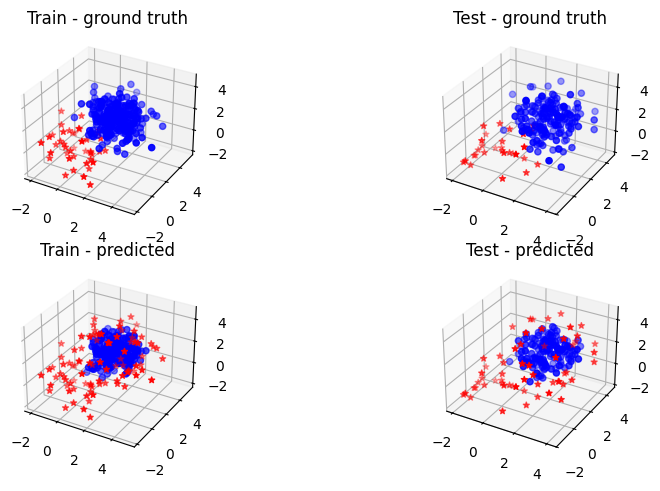

In [86]:
clf = ocsvm.OCSVM(kernel='rbf', contamination=.3)

clf.fit(X_train)

roc = roc_auc_score(y_test, clf.decision_function(X_test))
ba = balanced_accuracy_score(y_test, clf.predict(X_test))

print(f'ROC: {roc:.2f}, BA: {ba:.2f}')

plot_3d_outliers(X_train, y_train, X_test, y_test, clf)

Epoch 1/100, Loss: 9.431370794773102
Epoch 2/100, Loss: 9.690257489681244
Epoch 3/100, Loss: 9.647508919239044
Epoch 4/100, Loss: 9.636278748512268
Epoch 5/100, Loss: 9.617002546787262
Epoch 6/100, Loss: 9.632236182689667
Epoch 7/100, Loss: 9.289305865764618
Epoch 8/100, Loss: 9.472618162631989
Epoch 9/100, Loss: 9.534623742103577
Epoch 10/100, Loss: 9.566336750984192
Epoch 11/100, Loss: 9.685151994228363
Epoch 12/100, Loss: 9.335677444934845
Epoch 13/100, Loss: 9.453307330608368
Epoch 14/100, Loss: 9.378531217575073
Epoch 15/100, Loss: 9.494595646858215
Epoch 16/100, Loss: 9.548539936542511
Epoch 17/100, Loss: 9.725226879119873
Epoch 18/100, Loss: 9.295344531536102
Epoch 19/100, Loss: 9.607718467712402
Epoch 20/100, Loss: 9.784878313541412
Epoch 21/100, Loss: 9.26369971036911
Epoch 22/100, Loss: 9.62802940607071
Epoch 23/100, Loss: 9.566517412662506
Epoch 24/100, Loss: 9.316956639289856
Epoch 25/100, Loss: 9.632227659225464
Epoch 26/100, Loss: 9.529261887073517
Epoch 27/100, Loss: 9.4

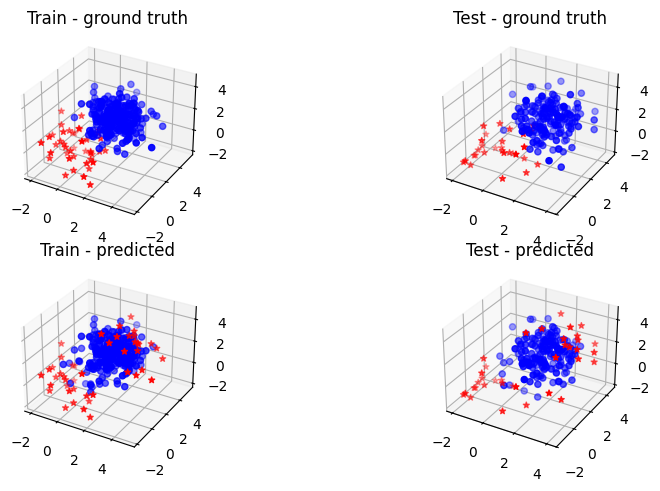

In [92]:
clf = deep_svdd.DeepSVDD(n_features=3, contamination=.15)

clf.fit(X_train)

roc = roc_auc_score(y_test, clf.decision_function(X_test))
ba = balanced_accuracy_score(y_test, clf.predict(X_test))

print(f'ROC: {roc:.2f}, BA: {ba:.2f}')
plot_3d_outliers(X_train, y_train, X_test, y_test, clf)

# Exercise 2

cardio = 